# New York City Airbnb Exploratory Data Analysis 2019

## https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import urllib
%matplotlib inline  


In [14]:
listings_df = pd.read_csv('AB_NYC_2019.csv')

### Let's remove some of the columns that we do not need.

In [17]:
columns_to_drop = ['id', 'host_name', 'last_review']
listings_df.drop(columns_to_drop, axis='columns', inplace=True)

### Let's remove the `NaN` values from the `reviews_per_month` column.

In [19]:
listings_df.fillna({'reviews_per_month':0}, inplace=True)

In [20]:
listings_df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### What are the 10 most reviewed listings?

In [23]:
listings_df.nlargest(10, 'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


### What are the New York City neighbourhood groups with listings?

In [26]:
listings_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### How many listings per neighbourhood group? 

In [27]:
listings_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### What are the top 10 neighbourhoods with Airbnb listings?

In [28]:
listings_df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

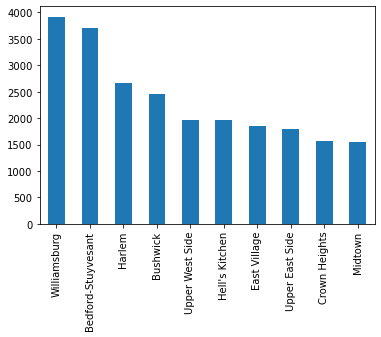

In [30]:
listings_df['neighbourhood'].value_counts().head(10).plot(kind='bar')

### What are the top neighbourhood groups?

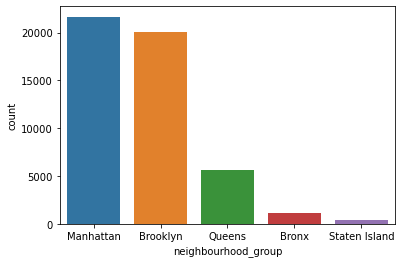

In [34]:
order = listings_df['neighbourhood_group'].value_counts().index
sns.countplot(data=listings_df, x='neighbourhood_group', order=order)

### What's the influence of neighbourhood group on room type?

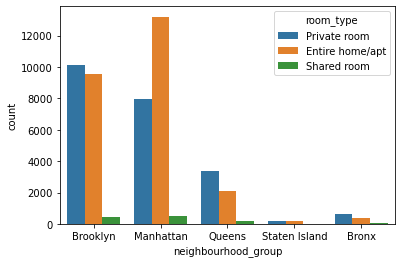

In [35]:
sns.countplot(data=listings_df, x='neighbourhood_group', hue='room_type')

### What is the distribution of flat prices? (After removing the outliers)

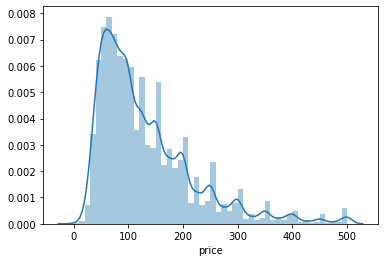

In [37]:
affordable_df = listings_df[listings_df['price'] <= 500]
sns.distplot(affordable_df['price'])

In [38]:
affordable_df['price'].mean()

131.53056362458466

### What is the distribution of flat prices based on the Neighbourhood Group?

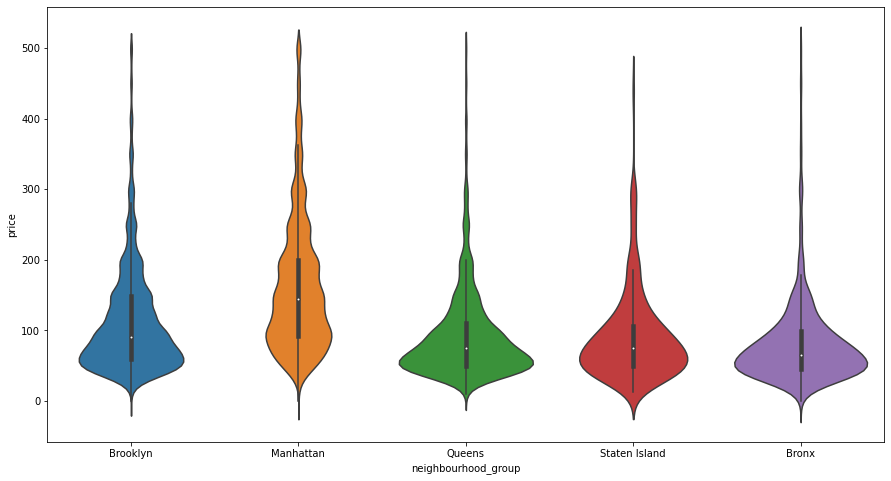

In [42]:
plt.figure(figsize=(15,8))
sns.violinplot(data=affordable_df, x='neighbourhood_group', y='price')

### What does this data look like on a map?

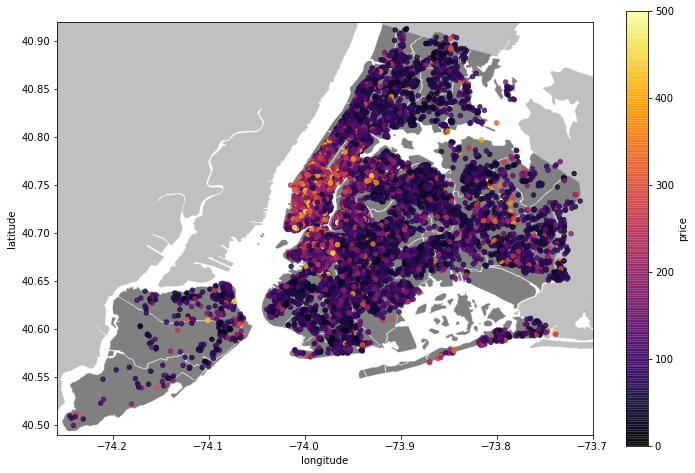

In [48]:
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
plt.imshow(plt.imread(i), zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()
affordable_df.plot(
    ax=ax,
    zorder=1,
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8))